## Data exploratory analysis
Let’s see the correlation between revenue, runtime, popularity, and budget.
https://medium.com/analytics-vidhya/how-to-use-machine-learning-approach-to-predict-movie-box-office-revenue-success-e2e688669972

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./DataPreprocessing/clean_movies_metadata.csv")

In [3]:
df.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,video,release_year,release_month,rating,rating_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,1995,10,7.7,5415.0
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,1995,12,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,1995,12,6.5,92.0
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,1995,12,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,1995,2,5.7,173.0


In [4]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'original_language', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'release_year', 'release_month', 'rating', 'rating_count'],
      dtype='object')

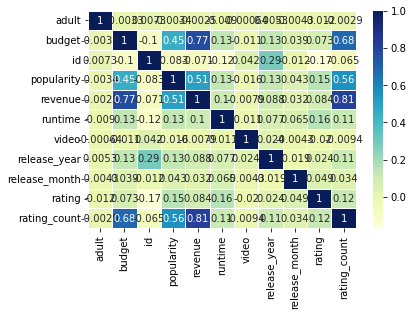

In [5]:
import seaborn as sns
# It’s very simple to find a correlation in python using the dataframe.corr() we will be using the seaborn library and corr() function to show the correlation between features

sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, linewidths = 0.5);

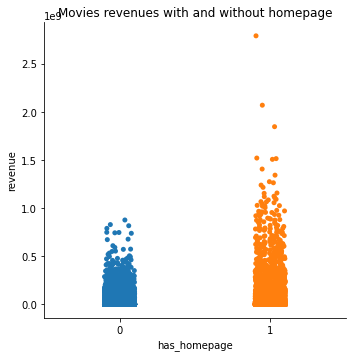

In [6]:
#we have a lot of null values for homepage
#Converting homepage as binary
df['has_homepage'] = 0
df.loc[df['homepage'].isnull() == False, 'has_homepage'] = 1
#Homepage v/s Revenue
sns.catplot(x='has_homepage', y='revenue', data=df);
plt.title('Movies revenues with and without homepage');

In [7]:
# drop homepage
df = df.drop(['homepage'],axis =1)

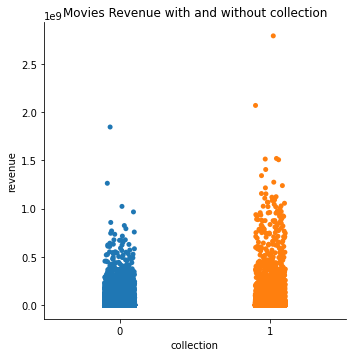

In [8]:
#Converting collections as binary
df['collection'] = 0
df.loc[df['belongs_to_collection'].isnull() == False, 'collection'] = 1
#collections v/s Revenue
sns.catplot(x='collection', y='revenue', data=df);
plt.title('Movies Revenue with and without collection');

In [9]:
# drop collection
df = df.drop(['collection'],axis =1)

In [10]:
#adding number of genres for each movie
genres_count=[]
for i in df['genres']:
    if(not(pd.isnull(i))):
        
        genres_count.append(len(eval(i)))
        
    else:
        genres_count.append(0)
df['num_genres'] = genres_count

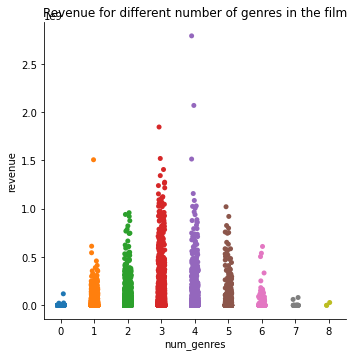

In [11]:
#Genres v/s revenue
sns.catplot(x='num_genres', y='revenue', data=df);
plt.title('Revenue for different number of genres in the film');

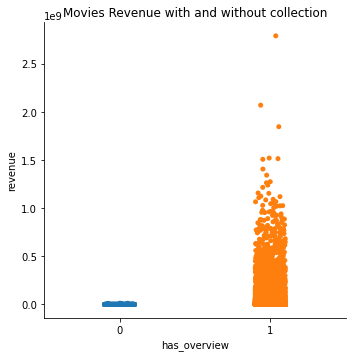

In [12]:
#Converting overviews as binary
df['has_overview'] = 0
df.loc[df['overview'].isnull() == False, 'has_overview'] = 1
#overview v/s Revenue
sns.catplot(x='has_overview', y='revenue', data=df);
plt.title('Movies Revenue with and without collection');

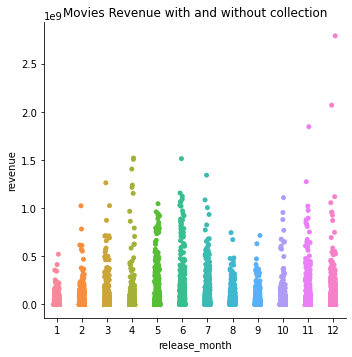

In [13]:
# Check how revenue depends of release month
#overview v/s Revenue
sns.catplot(x='release_month', y='revenue', data=df);
plt.title('Movies Revenue with and without collection');

We will be predicting the model from our data set. We will be choosing only numerical columns to predict our model. We will be replacing null value or zero values from the numeric column with a median. (like budget column, run time, revenue). Budget cannot be 0 so does revenue and run time.

In [14]:
# Prepare dataset for train the Model, we only use importance numeric columss
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'id',
       'original_language', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'release_year', 'release_month', 'rating', 'rating_count',
       'has_homepage', 'num_genres', 'has_overview'],
      dtype='object')

In [15]:
df.drop(["belongs_to_collection","overview","original_language", 'genres', 'original_language','production_companies',
       'production_countries', 'release_date', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'release_year',], axis=1,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45460 entries, 0 to 45459
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   adult          45460 non-null  bool   
 1   budget         45460 non-null  float64
 2   id             45460 non-null  int64  
 3   popularity     45460 non-null  float64
 4   revenue        45460 non-null  float64
 5   release_month  45460 non-null  int64  
 6   rating         45460 non-null  float64
 7   rating_count   45460 non-null  float64
 8   has_homepage   45460 non-null  int64  
 9   num_genres     45460 non-null  int64  
 10  has_overview   45460 non-null  int64  
dtypes: bool(1), float64(5), int64(5)
memory usage: 3.5 MB


In [17]:
df = df.drop(['adult'], axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45460 entries, 0 to 45459
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   budget         45460 non-null  float64
 1   id             45460 non-null  int64  
 2   popularity     45460 non-null  float64
 3   revenue        45460 non-null  float64
 4   release_month  45460 non-null  int64  
 5   rating         45460 non-null  float64
 6   rating_count   45460 non-null  float64
 7   has_homepage   45460 non-null  int64  
 8   num_genres     45460 non-null  int64  
 9   has_overview   45460 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 3.5 MB


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# linear regression

x = df.drop('revenue', axis = 1).values

y = df.revenue
# Split the dataset into training and test sets (80, 20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create linear regression
regr = LinearRegression()
# Use all the feature to fit the linear regression model for PRICE using the training set
regr.fit(x_train, y_train)

# The coefficients

coefficient = regr.coef_
print('Coefficients:', coefficient)
# The mean squared error
mean_square_error = np.mean((regr.predict(x_test) - y_test) ** 2)
v_score = regr.score(x_test, y_test)
print("Mean squared error: %.2f"
        %  mean_square_error)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % v_score)


Coefficients: [ 1.50864122e+00  1.67689860e+00  5.48688395e+05 -4.69134059e+04
 -5.00311720e+05  6.74326284e+04 -1.78913796e+06 -1.08070030e+06
 -1.29287247e+06]
Mean squared error: 976311298887212.50
Variance score: 0.74


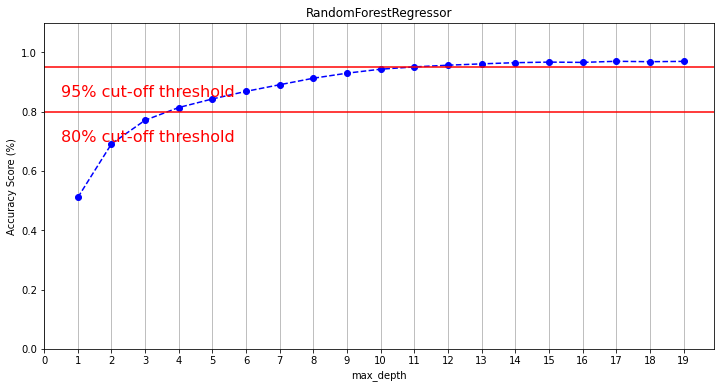

In [31]:
train_scores = []
random_forest_models = []
max_depth_k = 20 # After about depth 14 the score stays stagnant
for k in range(1,max_depth_k):
  #regr = DecisionTreeRegressor(max_depth=k)
  regr = RandomForestRegressor(max_depth=k)
  #regr = ske.AdaBoostRegressor(base_estimator=rfeRegr,n_estimators=100)
  regr.fit(x_train, y_train)
  train_scores.append(regr.score(x_train, y_train))
  random_forest_models.append(regr)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, max_depth_k, step=1)
y = train_scores

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('max_depth')
plt.xticks(np.arange(0, max_depth_k, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Accuracy Score (%)')
plt.title('RandomForestRegressor')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.70, '80% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [33]:
# r- square for max = 13 random forest

clf = random_forest_models[12]
clf.fit(x_train, y_train)
#Predict the response for train dataset
y_train_predict = clf.predict(x_train)
#Predict the response for test dataset
y_predict = clf.predict(x_test)
# print('accuracy of model: %.8f' % metrics.accuracy_score(y_test, y_predict))
print ("R-Squared is:", metrics.r2_score(y_predict, y_test))



R-Squared is: 0.7598771723176423


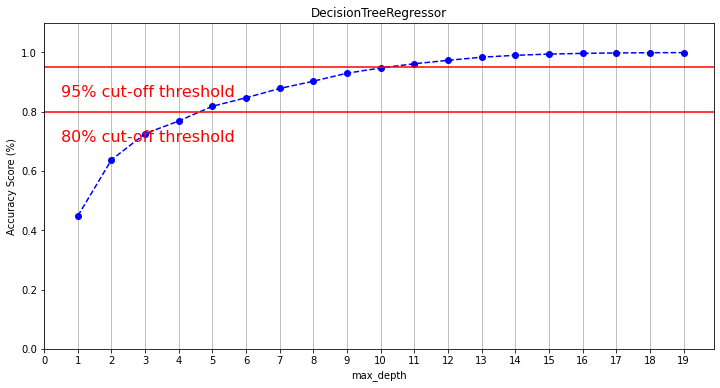

In [32]:
# Decision tree

from sklearn.tree import DecisionTreeRegressor
train_scores = []
decision_tree_models = []
max_depth_k = 20 # After about depth 14 the score stays stagnant
for k in range(1,max_depth_k):
  regr = DecisionTreeRegressor(max_depth=k)
  #regr = ske.RandomForestRegressor(max_depth=k)
  #regr = ske.AdaBoostRegressor(base_estimator=rfeRegr,n_estimators=100)
  regr.fit(x_train, y_train)
  train_scores.append(regr.score(x_train, y_train))
  decision_tree_models.append(regr)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, max_depth_k, step=1)
y = train_scores

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('max_depth')
plt.xticks(np.arange(0, max_depth_k, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Accuracy Score (%)')
plt.title('DecisionTreeRegressor')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.70, '80% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [34]:
# r- square for max = 14 decision tree

clf = decision_tree_models[13]
clf.fit(x_train, y_train)
#Predict the response for train dataset
y_train_predict = clf.predict(x_train)
#Predict the response for test dataset
y_predict = clf.predict(x_test)
# print('accuracy of model: %.8f' % metrics.accuracy_score(y_test, y_predict))
print ("R-Squared is:", metrics.r2_score(y_predict, y_test))


R-Squared is: 0.5915079472633953
